In [77]:
%matplotlib inline
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd

sea.set_palette("muted")

In [78]:
data=pd.read_csv("games-features.csv")

In [29]:
#Nekaj stvari ki nam bo v prihodnosti olajšalo iskanje 
known_meta=data[data["Metacritic"]!=0]
known_year=data[data["ReleaseYear"]!=0]
bad_games=known_meta[known_meta["Metacritic"]<=50]
average_games=data[data["Metacritic"].between(50,75, inclusive=True)]
good_games=data[data["Metacritic"].between(76,101,inclusive=False)]
rec=data["RecommendationCount"]
meta=data["Metacritic"]

There are 1665 free games, with an average of 4484.14739229 ratings per game.
There are 1665 free games, with an average of 72.2727272727 ratings per game.
There are 18931 free games, with an average of 3266.30456853 ratings per game.
There are 18931 free games, with an average of 71.6474820144 ratings per game.


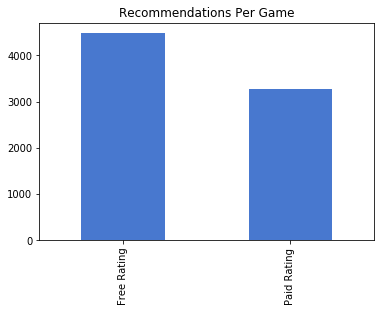

In [34]:
#Igra je brezplačna
free=data["IsFree"]==True
#število brezplačnih iger
free_count=data[free].count()
free_count
# Povprečno število priporočil
free_recommendation=data[(free) & (data['RecommendationCount'])].mean()
print ("There are", free_count[1], "free games, with an average of", free_recommendation[5], "ratings per game.")
#povprečna ocena brezplačnih iger
free_score=data[free & (data ["Metacritic"])].mean()
print ("There are", free_count[1], "free games, with an average of", free_score[3], "ratings per game.")
# ni brezplačna
paid=data["IsFree"]==False
#število takih iger
paid_count=data[paid].count()
#povprečno število priporočil
paid_recommendation=data[(paid) & (data['RecommendationCount'])].mean()
print ("There are", paid_count[1], "free games, with an average of", paid_recommendation[5], "ratings per game.")
#povprečna ocena
paid_score=data[paid & (data ["Metacritic"])].mean()
print ("There are", paid_count[1], "free games, with an average of", paid_score[3], "ratings per game.")

d = {'one' : pd.Series([free_recommendation[5], paid_recommendation[5]],
               index=['Free Rating', 'Paid Rating'])}#Rating
df = pd.DataFrame(d)
df.plot(kind='bar', title='Recommendations Per Game', legend=False)
plt.savefig("../report/graf_stevilo_ocen.png", bbox_inches='tight');

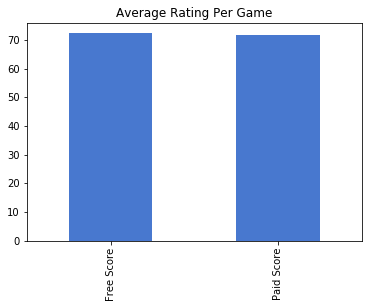

In [36]:
d = {'one' : pd.Series([free_score[3], paid_score[3]],
               index=['Free Score', 'Paid Score'])}#Rating
df = pd.DataFrame(d)
df.plot(kind='bar', title='Average Rating Per Game', legend=False)
plt.savefig("../report/graf_povprecna_ocena.png", bbox_inches='tight');

Je 13643 Indie iger  s/z povprečjem 2155.0405771 priporočili na igro.
Je 13643 Indie iger, s/z povprečno oceno 70.730829421 na igro.
Je 9171 Action iger  s/z povprečjem 5016.41087084 priporočilii na igro.
Je 9171 Action iger, s/z povprečno oceno 71.4358974359 na igro.
Je 7410 Adventure iger  s/z povprečjem 3855.26645768 priporočilii na igro.
Je 7410 Adventure iger, s/z povprečno oceno 70.7967479675 na igro.
Je 6688 Casual iger  s/z povprečjem 1541.78974359 priporočilii na igro.
Je 6688 Casual iger, s/z povprečno oceno 71.768 na igro.
Je 4035 Strategy iger  s/z povprečjem 2108.21071864 priporočilii na igro.
Je 4035 Strategy iger, s/z povprečno oceno 72.4235294118 na igro.
Je 3253 RPG iger  s/z povprečjem 4515.13896458 priporočilii na igro.
Je 3253 RPG iger, s/z povprečno oceno 72.4516129032 na igro.
Je 3638 Simulation iger  s/z povprečjem 2706.57800892 priporočilii na igro.
Je 3638 Simulation iger, s/z povprečno oceno 70.2670807453 na igro.
Je 2371 EarlyAccess iger  s/z povprečjem 3182.

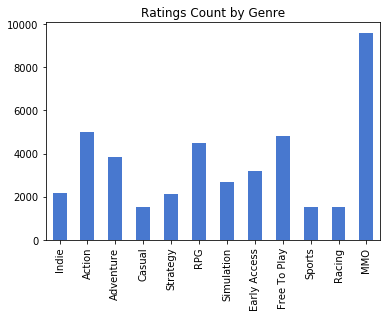

In [37]:
# Poglejmo si še za ostale žanre
indie = data[data['GenreIsIndie'] == True].count()
indier = data[(data['GenreIsIndie'] == True) & data['RecommendationCount']].mean()
indies = data[(data['GenreIsIndie'] == True) & data['Metacritic']].mean()
print ("Je", indie[5], "Indie iger  s/z povprečjem", indier[5], "priporočili na igro.")
print ("Je", indie[5], "Indie iger, s/z povprečno oceno", indies[3], "na igro.")
action = data[data['GenreIsAction'] == True].count()
actionr = data[(data['GenreIsAction'] == True) & data['RecommendationCount']].mean()
actions = data[(data['GenreIsAction'] == True) & data['Metacritic']].mean()
print ("Je", action[5], "Action iger  s/z povprečjem", actionr[5], "priporočilii na igro.")
print ("Je", action[5], "Action iger, s/z povprečno oceno", actions[3], "na igro.")
adventure = data[data['GenreIsAdventure'] == True].count()
adventurer = data[(data['GenreIsAdventure'] == True) & data['RecommendationCount']].mean()
adventures = data[(data['GenreIsAdventure'] == True) & data['Metacritic']].mean()
print ("Je", adventure[5], "Adventure iger  s/z povprečjem", adventurer[5], "priporočilii na igro.")
print ("Je", adventure[5], "Adventure iger, s/z povprečno oceno", adventures[3], "na igro.")
casual = data[data['GenreIsCasual'] == True].count()
casualr = data[(data['GenreIsCasual'] == True) & data['RecommendationCount']].mean()
casuals = data[(data['GenreIsCasual'] == True) & data['Metacritic']].mean()
print ("Je", casual[5], "Casual iger  s/z povprečjem", casualr[5], "priporočilii na igro.")
print ("Je", casual[5], "Casual iger, s/z povprečno oceno", casuals[3], "na igro.")
strategy = data[data['GenreIsStrategy'] == True].count()
strategyr = data[(data['GenreIsStrategy'] == True) & data['RecommendationCount']].mean()
strategys = data[(data['GenreIsStrategy'] == True) & data['Metacritic']].mean()
print ("Je", strategy[5], "Strategy iger  s/z povprečjem", strategyr[5], "priporočilii na igro.")
print ("Je", strategy[5], "Strategy iger, s/z povprečno oceno", strategys[3], "na igro.")
rpg = data[data['GenreIsRPG'] == True].count()
rpgr = data[(data['GenreIsRPG'] == True) & data['RecommendationCount']].mean()
rpgs = data[(data['GenreIsRPG'] == True) & data['Metacritic']].mean()
print ("Je", rpg[5], "RPG iger  s/z povprečjem", rpgr[5], "priporočilii na igro.")
print ("Je", rpg[5], "RPG iger, s/z povprečno oceno", rpgs[3], "na igro.")
simulator = data[data['GenreIsSimulation'] == True].count()
simulatorr = data[(data['GenreIsSimulation'] == True) & data['RecommendationCount']].mean()
simulators = data[(data['GenreIsSimulation'] == True) & data['Metacritic']].mean()
print ("Je", simulator[5], "Simulation iger  s/z povprečjem", simulatorr[5], "priporočilii na igro.")
print ("Je", simulator[5], "Simulation iger, s/z povprečno oceno", simulators[3], "na igro.")
earlya = data[data['GenreIsEarlyAccess'] == True].count()
earlyar = data[(data['GenreIsEarlyAccess'] == True) & data['RecommendationCount']].mean()
earlyas = data[(data['GenreIsEarlyAccess'] == True) & data['Metacritic']].mean()
print ("Je", earlya[5], "EarlyAccess iger  s/z povprečjem", earlyar[5], "priporočilii na igro.")
print ("Je", earlya[5], "EarlyAccess iger, s/z povprečno oceno", earlyas[3], "na igro.")
free_to_play = data[data['GenreIsFreeToPlay'] == True].count()
free_to_playr = data[(data['GenreIsFreeToPlay'] == True) & data['RecommendationCount']].mean()
free_to_plays = data[(data['GenreIsFreeToPlay'] == True) & data['Metacritic']].mean()
print ("Je", free_to_play[5], "FreeToPlay iger  s/z povprečjem", free_to_playr[5], "priporočilii na igro.")
print ("Je", free_to_play[5], "FreeToPlay iger, s/z povprečno oceno", free_to_plays[3], "na igro.")
sport = data[data['GenreIsSports'] == True].count()
sportr = data[(data['GenreIsSports'] == True) & data['RecommendationCount']].mean()
sports = data[(data['GenreIsSports'] == True) & data['Metacritic']].mean()
print ("Je", sport[5], "Sports iger  s/z povprečjem", sportr[5], "priporočilii na igro.")
print ("Je", sport[5], "Sports iger, s/z povprečno oceno", sports[3], "na igro.")
racing = data[data['GenreIsRacing'] == True].count()
racingr = data[(data['GenreIsRacing'] == True) & data['RecommendationCount']].mean()
racings = data[(data['GenreIsRacing'] == True) & data['Metacritic']].mean()
print ("Je", racing[5], "Racing iger  s/z povprečjem", racingr[5], "priporočilii na igro.")
print ("Je", racing[5], "Racing iger, s/z povprečno oceno", racings[3], "na igro.")
gmmo = data[data['GenreIsMassivelyMultiplayer'] == True].count()
gmmor = data[(data['GenreIsMassivelyMultiplayer'] == True) & data['RecommendationCount']].mean()
gmmos = data[(data['GenreIsMassivelyMultiplayer'] == True) & data['Metacritic']].mean()
print ("Je", gmmo[5], "MassivelyMultiplayer iger  s/z povprečjem", gmmor[5], "priporočilii na igro.")
print ("Je", gmmo[5], "MassivelyMultiplayer iger, s/z povprečno oceno", gmmos[3], "na igro.")
d = {'one' : pd.Series([ indier[5], actionr[5], adventurer[5], casualr[5], strategyr[5], rpgr[5],
                       simulatorr[5], earlyar[5], free_to_playr[5], sportr[5], racingr[5], gmmor[5]],
               index=['Indie', 'Action', 'Adventure', 'Casual', 'Strategy', 'RPG',
                     'Simulation', 'Early Access', 'Free To Play', 'Sports', 'Racing', 'MMO'])}#Rating
df = pd.DataFrame(d)
df.plot(kind='bar', title='Ratings Count by Genre', legend=False)
plt.savefig("../report/genre-ratings-bar.png", bbox_inches='tight');

,one
Indie,70.730829
Action,71.435897
Adventure,70.796748
Casual,71.768000
Strategy,72.423529
RPG,72.451613
Simulation,70.267081
Early Access,73.000000
Free To Play,71.157895
Sports,73.424242


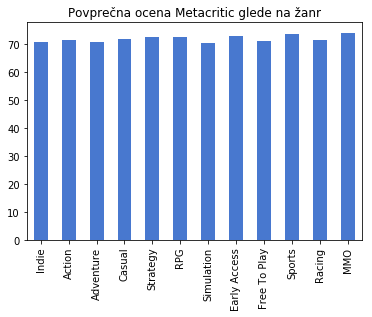

In [45]:
d = {'one' : pd.Series([ indies[3], actions[3], adventures[3], casuals[3], strategys[3], rpgs[3],
                       simulators[3], earlyas[3], free_to_plays[3], sports[3], racings[3], gmmos[3]],
               index=[ 'Indie', 'Action', 'Adventure', 'Casual', 'Strategy', 'RPG',
                     'Simulation', 'Early Access', 'Free To Play', 'Sports', 'Racing', 'MMO'])}#Scoring
df = pd.DataFrame(d)
df.plot(kind='bar', legend=False, title="Povprečna ocena Metacritic glede na žanr")
plt.savefig("../report/žanr-meta-pov.png", bbox_inches='tight');
df

In [128]:
df.sort_values("one",ascending=False)

,one
MMO,73.960000
Sports,73.424242
Early Access,73.000000
RPG,72.451613
Strategy,72.423529
Casual,71.768000
Action,71.435897
Racing,71.425532
Free To Play,71.157895
Adventure,70.796748


In [129]:
data[free&(data['Metacritic'])].mean()[3]

72.272727272727266

In [130]:
data[free &data['Metacritic']].count()[1]

55

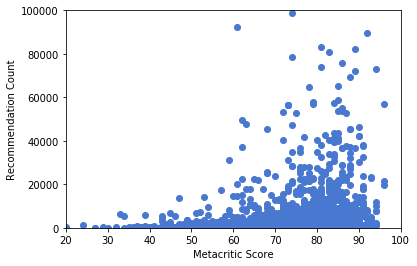

In [10]:
#Priporočila v odvisnosti od Metacritic ocene (Y,X)
graf_meta_rec = plt.scatter(data['Metacritic'],data['RecommendationCount'])
plt.xlabel('Metacritic Score')
plt.ylabel('Recommendation Count')
plt.xlim((20,100))
plt.ylim(0, 100000)
plt.savefig("../report/graf_meta_rec.png", bbox_inches='tight');

In [90]:
#Poglejmo število DLC-ov na leto
dlc_per_year=known_year[["ReleaseYear","DLCCount"]].groupby("ReleaseYear").sum()
# povprečni meta-score
meta_per_year=known_meta[["ReleaseYear","Metacritic"]].groupby("ReleaseYear").mean()

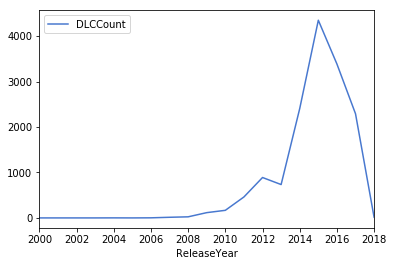

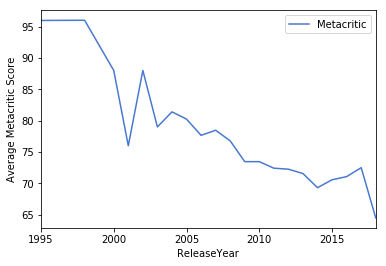

In [93]:
dlc_per_year.plot(xlim=(2000,2018))
plt.savefig("../report/graf_stevilo_dlc_leto.png", bbox_inches='tight');
meta_per_year.plot(xlim=(1995,2018)).set_ylabel("Average Metacritic Score")
plt.savefig("../report/fgraf_povprecna_ocena_leto.png", bbox_inches='tight');

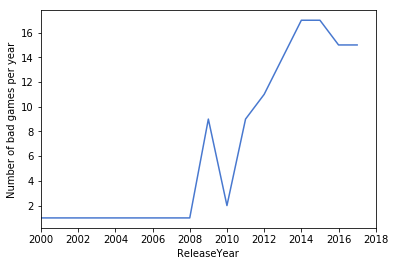

In [18]:
bad_games.groupby("ReleaseYear").size().plot(xlim=(2000,2018)).set_ylabel("Number of bad games per year")
plt.savefig("../report/graf_SlabeIgre_leto.png", bbox_inches='tight');

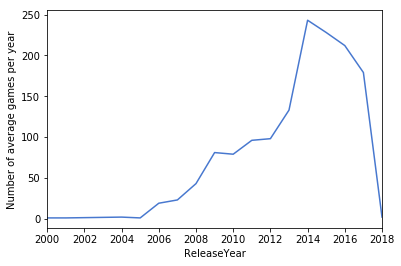

In [19]:
average_games.groupby("ReleaseYear").size().plot(xlim=(2000,2018)).set_ylabel("Number of average games per year")
plt.savefig("../report/graf_PovprecneIgre_leto.png", bbox_inches='tight');

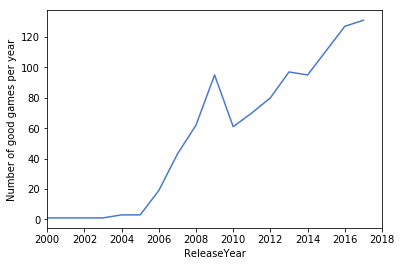

In [20]:
good_games.groupby("ReleaseYear").size().plot(xlim=(2000,2018)).set_ylabel("Number of good games per year")
plt.savefig("../report/graf_Dobre_leto.png", bbox_inches='tight');

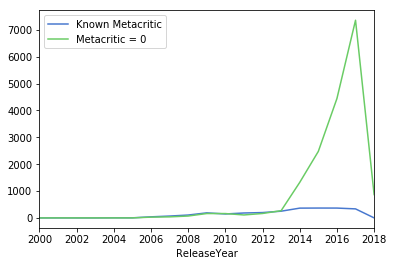

In [131]:
known_meta.groupby("ReleaseYear").size().plot(xlim=(2000,2018))
data[data["Metacritic"]==0].groupby("ReleaseYear").size().plot(xlim=(2000,2018)).legend(['Known Metacritic','Metacritic = 0'])
plt.savefig("../report/KnownVsUnknown.png", bbox_inches='tight');

In [20]:
top_games=data[["ResponseName","Metacritic","SteamSpyPlayersEstimate"]]

In [21]:
top_games.set_index("ResponseName",inplace=True)

In [25]:
top_games.sort_values("SteamSpyPlayersEstimate",ascending=False)[:10]

,Metacritic,SteamSpyPlayersEstimate
ResponseName,,
Dota 2,90,118533828
Team Fortress 2,92,44127505
Counter-Strike: Global Offensive,83,36514413
Unturned,0,26970072
PLAYERUNKNOWNS BATTLEGROUNDS,86,26156239
Left 4 Dead 2,89,16859407
Garrys Mod,0,13696893
Warframe,69,13185680
Paladins(r),0,13184955
